<a href="https://colab.research.google.com/github/lsmanoel/CEM_4/blob/master/2d_open_All_matrix_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSV from Github:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
#@CSV from Github
import numpy as np
import pandas as pd
from matplotlib.ticker import IndexFormatter

url_elc_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20%20plane_bottom_24_MHz.csv'
url_elc_plane_bottom_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_bottom_500_KHz.csv'
url_elc_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_24_MHz.csv'
url_elc_plane_top_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_500_KHz.csv'
url_mag_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_bottom_24_MHz.csv'
url_mag_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_top_24_MHz.csv'

columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
rows_name = np.arange(1,14,1).tolist()
xticks_formatter = IndexFormatter(columns_name)
yticks_formatter = IndexFormatter(rows_name)

pd_elc_plane_bottom_24_MHz = pd.read_csv(url_elc_plane_bottom_24_MHz, names=columns_name)
pd_elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz[pd_elc_plane_bottom_24_MHz.columns[::-1]]
pd_elc_plane_bottom_500_KHz = pd.read_csv(url_elc_plane_bottom_500_KHz, names=columns_name)
pd_elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz[pd_elc_plane_bottom_500_KHz.columns[::-1]]
pd_mag_plane_bottom_24_MHz = pd.read_csv(url_mag_plane_bottom_24_MHz, names=columns_name)
pd_mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz[pd_mag_plane_bottom_24_MHz.columns[::-1]]

pd_elc_plane_top_24_MHz = pd.read_csv(url_elc_plane_top_24_MHz, names=columns_name)
pd_elc_plane_top_500_KHz = pd.read_csv(url_elc_plane_top_500_KHz, names=columns_name)
pd_mag_plane_top_24_MHz = pd.read_csv(url_mag_plane_top_24_MHz, names=columns_name)

elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz.values
elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz.values
elc_plane_top_24_MHz = pd_elc_plane_top_24_MHz.values
elc_plane_top_500_KHz = pd_elc_plane_top_500_KHz.values
mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz.values
mag_plane_top_24_MHz = pd_mag_plane_top_24_MHz.values

elc_plane_bottom_24_MHz = -elc_plane_bottom_24_MHz
elc_plane_bottom_500_KHz = -elc_plane_bottom_500_KHz
elc_plane_top_24_MHz = -elc_plane_top_24_MHz
elc_plane_top_500_KHz = -elc_plane_top_500_KHz
mag_plane_bottom_24_MHz = -mag_plane_bottom_24_MHz
mag_plane_top_24_MHz = -mag_plane_top_24_MHz


---
##  Plot 2d: Global Config

In [0]:
cube_range = (0, 13)

figure_size = (18,8)
plot_layout = (1, 2)

gap_layout = (5.5,1,1,9) # (Posição_inicial_X, Posição_inicial_Y, Largura, Altura).

##  Plot 2d: Global Config - Elétrico

In [0]:
elc_global_scale = (10, -60)
elc_private_scale = ((
    np.max(np.array([*elc_plane_bottom_24_MHz,
                     *elc_plane_bottom_500_KHz,
                     *elc_plane_top_24_MHz,
                     *elc_plane_top_500_KHz])), 
    np.min(np.array([*elc_plane_bottom_24_MHz,
                     *elc_plane_bottom_500_KHz,
                     *elc_plane_top_24_MHz,
                     *elc_plane_top_500_KHz])))
)

elc_cube_range = cube_range

elc_figure_size = figure_size
elc_plot_layout = plot_layout

##  Plot 2d: Global Config - Magnético

In [0]:
mag_global_scale = (10, -60)
mag_private_scale = ((
    np.max(np.array([*mag_plane_bottom_24_MHz,
                     *mag_plane_top_24_MHz])), 
    np.min(np.array([*mag_plane_bottom_24_MHz,
                     *mag_plane_top_24_MHz])))
)

mag_cube_range = cube_range

mag_figure_size = figure_size
mag_plot_layout = plot_layout

---
##  Plot 2d: Top - 500  KHz - Elétrico

In [0]:
pd_elc_plane_top_500_KHz

In [0]:
Z = elc_plane_top_500_KHz

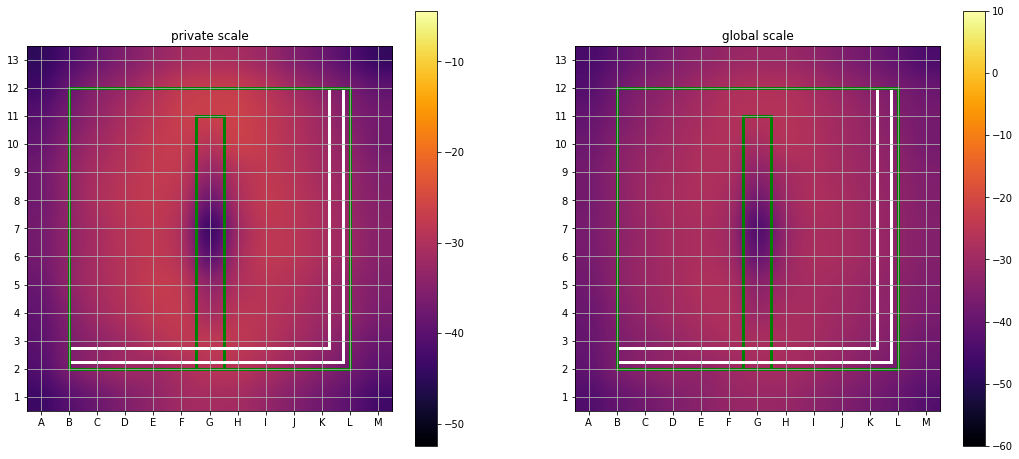

In [23]:
Z = Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_private_scale[0],
                vmin = elc_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)
  
# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_global_scale[0],
                vmin = elc_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)
  
#===============================================================================
plt.show()


---
##  Plot 2d: Bottom - 500  KHz  - Elétrico

In [0]:
pd_elc_plane_bottom_500_KHz

In [0]:
Z = elc_plane_bottom_500_KHz

In [0]:
Z = Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_private_scale[0],
                vmin = elc_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_global_scale[0],
                vmin = elc_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

#===============================================================================
plt.show()


---
##  Plot 2d: Top - 24  MHz  - Elétrico

In [0]:
pd_elc_plane_top_24_MHz

In [0]:
 Z = elc_plane_top_24_MHz

In [0]:
Z = Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_private_scale[0],
                vmin = elc_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_global_scale[0],
                vmin = elc_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)
#===============================================================================
plt.show()


---
##  Plot 2d: Bottom - 24  MHz  - Elétrico

In [0]:
pd_elc_plane_bottom_24_MHz

In [0]:
Z = elc_plane_bottom_24_MHz

In [0]:
Z = Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_private_scale[0],
                vmin = elc_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

# ==============================================================================  
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = elc_global_scale[0],
                vmin = elc_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

#===============================================================================
plt.show()


---
##  Plot 2d: Top - 24  MHz  - Magnético

In [0]:
pd_mag_plane_top_24_MHz

In [0]:
Z = mag_plane_top_24_MHz

In [0]:
Z = Z[mag_cube_range[0]:mag_cube_range[1], mag_cube_range[0]:mag_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=mag_figure_size)

# ==============================================================================  
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = mag_private_scale[0],
                vmin = mag_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

ax.grid(True)

# ==============================================================================  
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = mag_global_scale[0],
                vmin = mag_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

ax.grid(True)

#===============================================================================
plt.show()


---
##  Plot 2d: Bottom - 24  MHz Magnético

In [0]:
pd_mag_plane_bottom_24_MHz

In [0]:
Z = mag_plane_bottom_24_MHz

In [0]:
Z = Z[mag_cube_range[0]:mag_cube_range[1], mag_cube_range[0]:mag_cube_range[1]]

import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================  
fig = plt.figure(figsize=mag_figure_size)

# ==============================================================================  
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 1)
ax.set_title('private scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = mag_private_scale[0],
                vmin = mag_private_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

# ==============================================================================  
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 2)
ax.set_title('global scale')

img = ax.imshow(Z, 
                interpolation ='gaussian', 
                cmap ='inferno',
                vmax = mag_global_scale[0],
                vmin = mag_global_scale[1])

fig.colorbar(img, ax=ax)

ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_xticks(np.arange(cube_range[0], cube_range[1],1))

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.grid(True)

# ------------------------------------------------------------------------------
# EUT Layout
gap = patches.Rectangle(np.array(gap_layout[:2]),
                        gap_layout[2],
                        gap_layout[3],
                        linewidth=3,
                        edgecolor='g',
                        facecolor='none')
ax.add_patch(gap)

L_layout = [[1, 1.25], [10.75, 1.25], [10.75, 11], [10.25, 11], [10.25, 1.75], [1, 1.75]]
L = patches.Polygon(np.array(L_layout),lw=3, ec='w',fc='none')
ax.add_patch(L)

edge = patches.Rectangle((1,1),10,10,linewidth=3,edgecolor='g',facecolor='none')
ax.add_patch(edge)

#===============================================================================
plt.show()
